### This notebook aims to explore the dataset `global_renewable_energy_production.csv` to understand its structure, identify trends, and detect any potential data issues.


In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
sns.set(style="whitegrid")
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [56]:
import torch 
if torch.cuda.is_available():
    print("CUDA is available. Using GPU")
    device = torch.device("cuda")

CUDA is available. Using GPU


In [57]:
# Loading the data
data_path = "../data/raw/global_renewable_energy_production.csv"
df = pd.read_csv(data_path)
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.2+ KB


(   Year Country  SolarEnergy   WindEnergy  HydroEnergy  OtherRenewableEnergy  \
 0  2000     USA   437.086107  1435.928598  1544.389701            319.396318   
 1  2001     USA   240.416776   402.792876   398.742141            439.779266   
 2  2002     USA   641.003511  1120.494351   334.993640            486.459433   
 3  2003     USA   849.198377   476.040844   609.102444            132.532029   
 4  2004     USA   373.818019   882.183361  1034.306532            181.053113   
 
    TotalRenewableEnergy  
 0           3736.800724  
 1           1481.731059  
 2           2582.950935  
 3           2066.873694  
 4           2471.361025  ,
 None)

In [58]:
df.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


In [59]:
# checking for missing vleus
msv = df.isnull().sum()
msv

Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64

/tmp/ipykernel_9727/3182329208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="viridis")


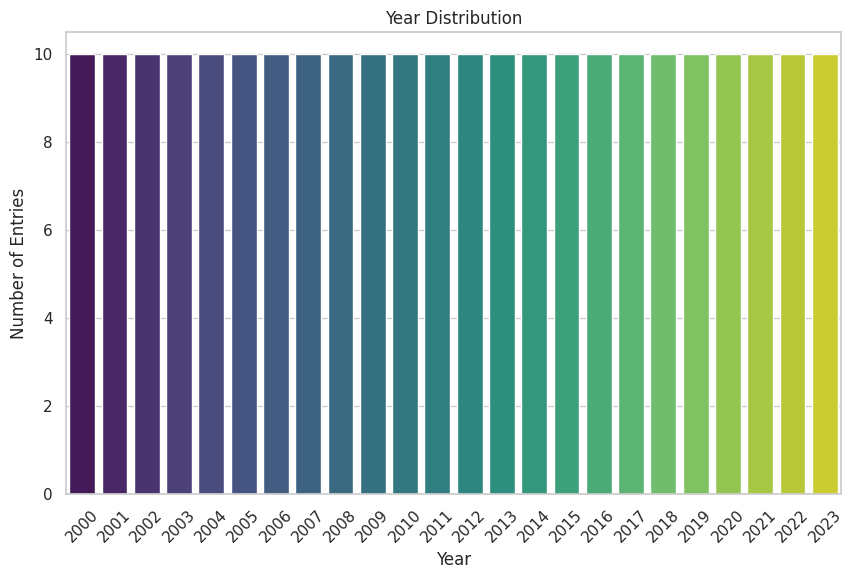

In [60]:
# Distribution of years in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(x="Year", data=df, palette="viridis")
plt.title("Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.show()

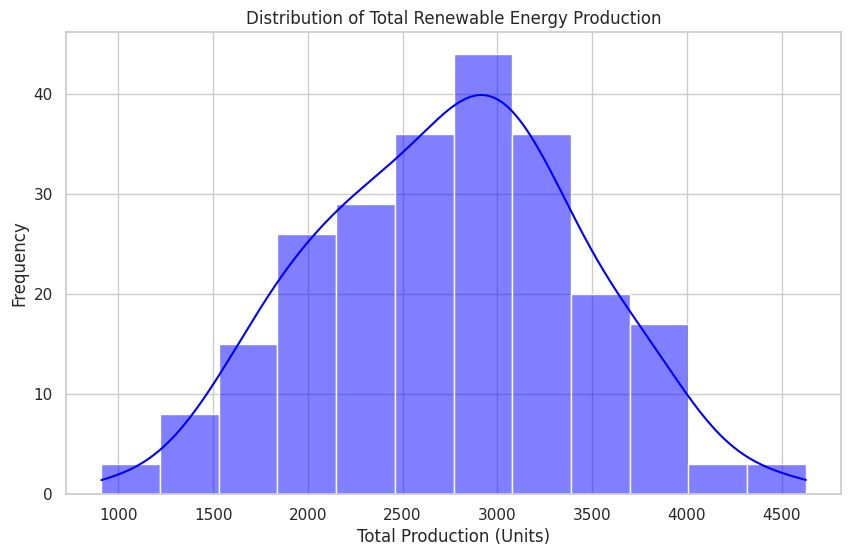

In [61]:
# Distributions of total ranewable energy Production
plt.figure(figsize=(10,6))
sns.histplot(df["TotalRenewableEnergy"],kde=True,color="Blue")
plt.title("Distribution of Total Renewable Energy Production")
plt.xlabel("Total Production (Units)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_9727/594870038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year",y="TotalRenewableEnergy",data=df, estimator="sum",ci=None,color="green")


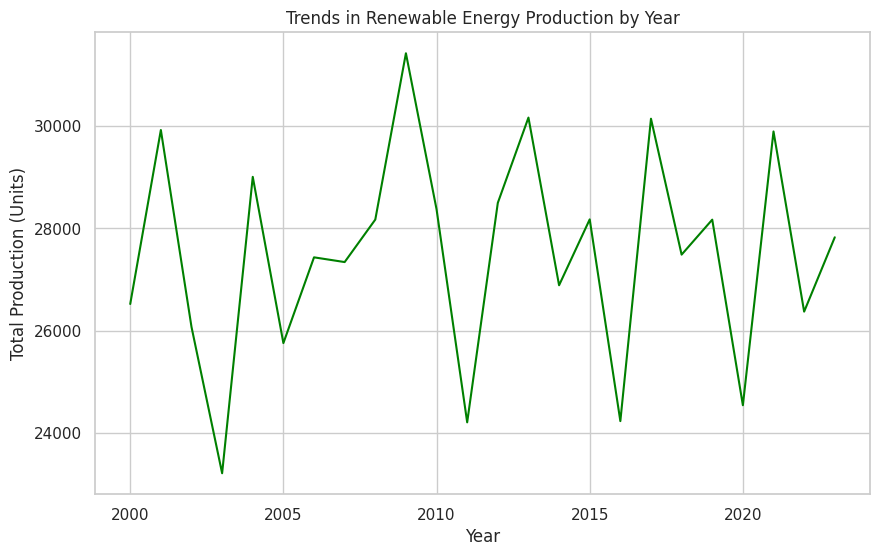

In [62]:
# Trends in renewable energy production by year
plt.figure(figsize=(10,6))
sns.lineplot(x="Year",y="TotalRenewableEnergy",data=df, estimator="sum",ci=None,color="green")
plt.title("Trends in Renewable Energy Production by Year")
plt.xlabel("Year")
plt.ylabel("Total Production (Units)")
plt.show()

/tmp/ipykernel_9727/3229036571.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalRenewableEnergy",y="Country",data=top_countries,palette="coolwarm")


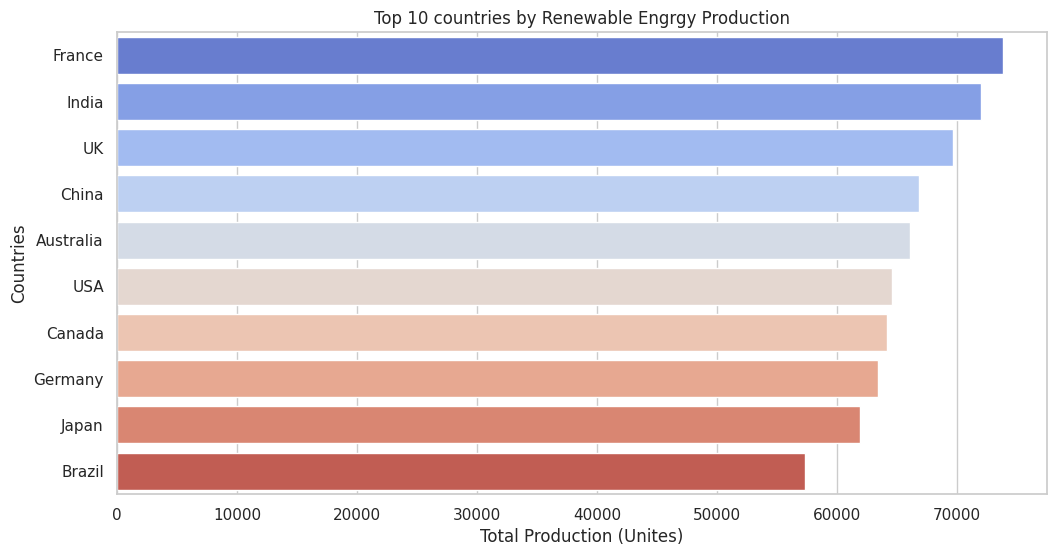

In [67]:
# Renewable Energy Productions by Country(Top 10)
top_countries = df.groupby("Country")["TotalRenewableEnergy"].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x="TotalRenewableEnergy",y="Country",data=top_countries,palette="coolwarm")
plt.title("Top 10 countries by Renewable Engrgy Production")
plt.xlabel("Total Production (Unites)")
plt.ylabel("Countries")
plt.show()

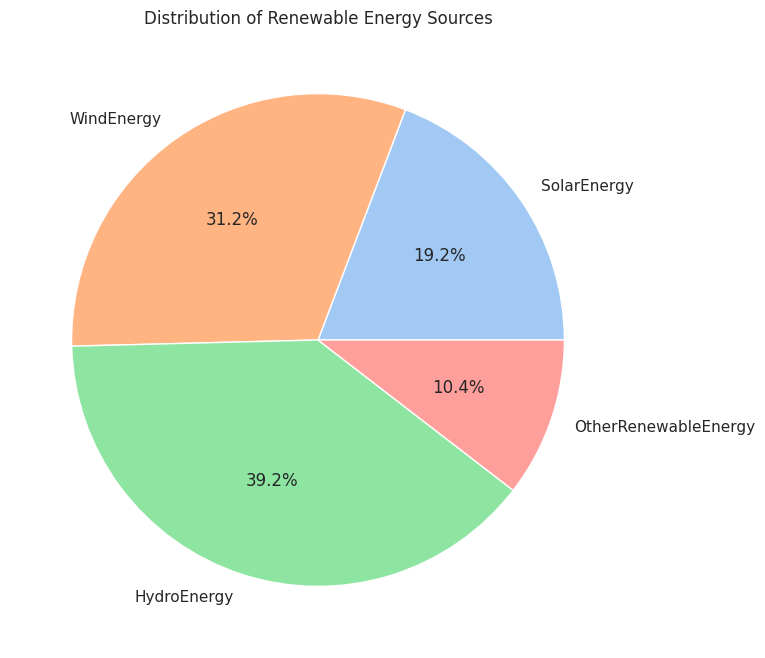

In [69]:
# Distribution of renewable energy sources
energy_sources = df[["SolarEnergy", "WindEnergy", "HydroEnergy", "OtherRenewableEnergy"]].sum()
plt.figure(figsize=(8, 8))
plt.pie(energy_sources, labels=energy_sources.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of Renewable Energy Sources")
plt.show()


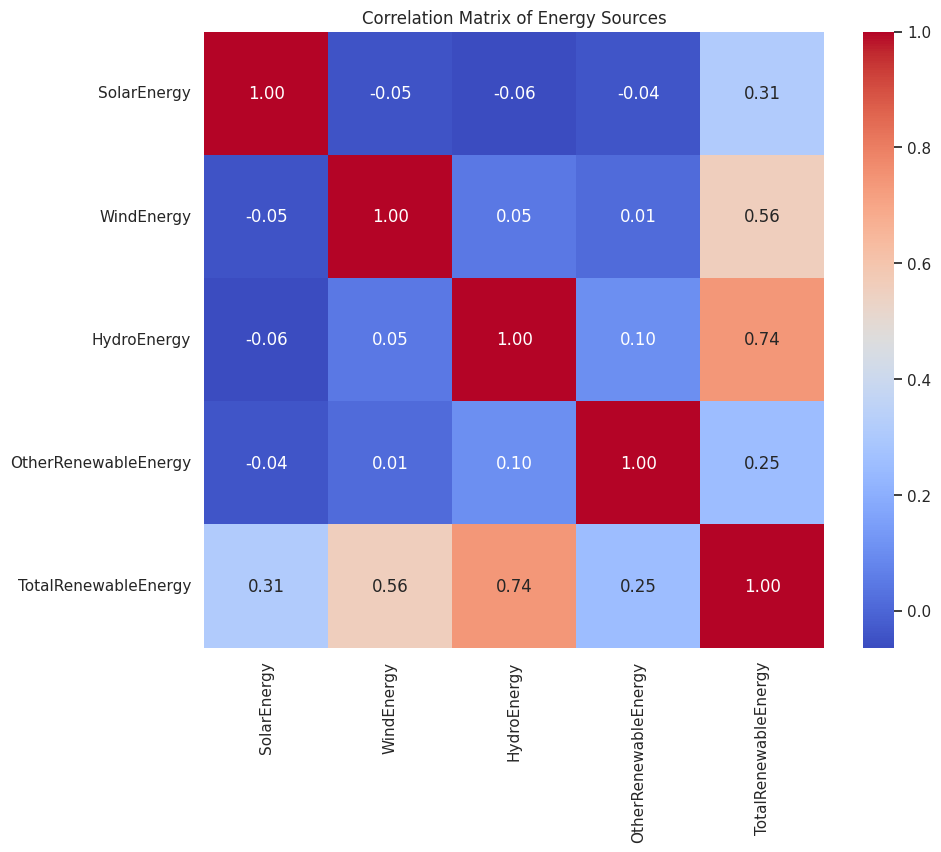

In [70]:
# Correlations between different energy sources
corr_matrix = df[["SolarEnergy", "WindEnergy", "HydroEnergy", "OtherRenewableEnergy", "TotalRenewableEnergy"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Energy Sources")
plt.show()

In [71]:
# Interactive visualization of production by country and year
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode="country names", 
                    color="TotalRenewableEnergy", 
                    hover_name="Country", 
                    animation_frame="Year", 
                    range_color=[0, df["TotalRenewableEnergy"].max()], 
                    title="Renewable Energy Production by Country and Year")
fig.show()

In [72]:
# Conclusion of the EDA
print("""
Conclusion of the Exploratory Data Analysis (EDA):
1. The dataset contains annual data on renewable energy production for several countries.
2. No missing values were detected.
3. The trends show a global increase in renewable energy production over the years.
4. Some countries dominate in terms of total production.
5. Renewable energy sources are well distributed, with hydroelectric power being the dominant source.
6. Positive correlations exist between certain energy sources.
""")


Conclusion of the Exploratory Data Analysis (EDA):
1. The dataset contains annual data on renewable energy production for several countries.
2. No missing values were detected.
3. The trends show a global increase in renewable energy production over the years.
4. Some countries dominate in terms of total production.
5. Renewable energy sources are well distributed, with hydroelectric power being the dominant source.
6. Positive correlations exist between certain energy sources.

